# A Complete Mathematical Intuition Behind Linear Regression Algorithm

How do we decide when to use a linear regression model? How does a system decide the best fit line, the error and how it can be minimized? This notebook will provide answers to these questions and an understanding of the linear regression approach as a whole.

## What is linear regression?

Linear regression is a procedure used in statistics. As the term implies, it can only be used when there is a linear relationship among the variables. It’s used as a model for understanding the association between independent and dependent variables as well as to foresee the connection between quantitative variables: predictor variables, which are known as independent variables, and dependent variables, which are those being predicted. 

For example, you want to predict the price of a house based on its Area, Garage Area, Land Contour, Utilities, etc. Here, "price" will be the dependent variable and "Area, Garage Area, Land Contour, Utilities" will be the independent variable.

## Real-life examples of regression

**Example #1**
Businesses frequently use linear regression to comprehend the connection between advertising spending and revenue. For instance, they might apply the linear regression model using advertising spend as an independent variable or predictor variable and revenue as the response variable. The equation would take the following form:

$$
\text{revenue} = \beta_0 + \beta_1*\text{ad.spending}
$$

**Example #2**
Linear regression may be used in the medical field to understand the relationships between drug dosage and patient blood pressure. Researchers may manage different measurements of a specific medication to patients and see how their circulatory strain reacts/blood pressure responds. They might fit a model using dosage as an independent variable and blood pressure as the dependent variable. The equation would be:

$$
\text{blood pressure} = \beta_0 + \beta_1*\text{dosage}
$$

**Example #3**
Agriculture scientists frequently use linear regression to see the impact of rainfall and fertilizer on the amount of fruits/vegetables yielded. For instance, scientists might use different amounts of fertilizer and see the effect of rain on different fields and to ascertain how it affects crop yield. They might fit a multiple linear regression using rainfall and fertilizer as the predictor variables and crop yield as the dependent variable or response variable. The regression model would take the following form:

$$
\text{crop yield} = \beta_0 + \beta_1*\text{rainfall} + \beta_2\text{fertilizer}
$$

> **Note:**
> Linear regression is mainly applied when there is a linear relationship among variables. A simple way to check this relationship is 
> to make a pair plot or scatter plot between the variables. The graph will show if linear regression is applicable or not.

## What kind of relationship can linear regression show?

**Positive relationship**
- When the regression line between the two variables moves in the same direction with an upward slope, the variables are said to be in a positive relationship. This means that if the value of x (independent variable) is increased, there will be an increase in the dependent variable.

**Negative relationship**
- When the regression line between the two variables moves in the same direction with a downward slope, the variables are said to be in a negative relationship. This shows that if the value of the independent variable (x) is increased, there will be a decrease in the dependent variable (y).

**No relationship**
- If the best fit line is flat (not sloped), it’s assumed that there is no relationship among the variables. There will be no change in the dependent variable (y) by increasing or decreasing the independent variable (x) value.

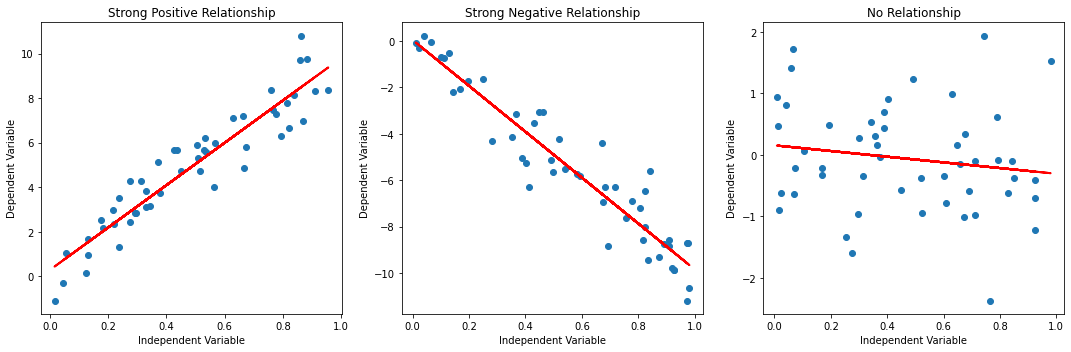

In [13]:
import numpy as np
import matplotlib.pyplot as plt

strength = 10
# Positive relationship
x_positive = np.random.rand(50)
y_positive = strength*x_positive + np.random.randn(50)

# Negative relationship  
x_negative = np.random.rand(50)
y_negative = -strength*x_negative + np.random.randn(50)

# No relationship
x_no_relationship = np.random.rand(50)
y_no_relationship = np.random.randn(50)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Positive relationship
m_positive, b_positive = np.polyfit(x_positive, y_positive, 1)
ax1.scatter(x_positive, y_positive)
ax1.plot(x_positive, m_positive*x_positive + b_positive, color='red', linewidth=2)
ax1.set_title('Strong Positive Relationship')
ax1.set_xlabel('Independent Variable')
ax1.set_ylabel('Dependent Variable')

# Negative relationship  
m_negative, b_negative = np.polyfit(x_negative, y_negative, 1)
ax2.scatter(x_negative, y_negative)
ax2.plot(x_negative, m_negative*x_negative + b_negative, color='red', linewidth=2)
ax2.set_title('Strong Negative Relationship')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Dependent Variable')

# No relationship
m_no_relationship, b_no_relationship = np.polyfit(x_no_relationship, y_no_relationship, 1)
ax3.scatter(x_no_relationship, y_no_relationship)
ax3.plot(x_no_relationship, m_no_relationship*x_no_relationship + b_no_relationship, color='red', linewidth=2)
ax3.set_title('No Relationship')
ax3.set_xlabel('Independent Variable')
ax3.set_ylabel('Dependent Variable')

plt.tight_layout()
plt.show()




You can also determine what kind of relationship these variables have by using *correlation* or *covariance*.

**Covariance** shows the direction of the relationship between X and Y but it doesn't say how positive or negative the relationship is. To know this, remember that if the covariance value is negative and if the independent variable (X) increases, the dependent variable (Y) decreases and vice versa.

**Correlation** is a statistical measure that shows the direction of the relationship as well as the strength of the relationship (how positively or negatively the variables are correlated). The range of correlation is between $-1<\text{correlation}< 1$. It’s called a perfect correlation if all points fall on the best fit line - which is very unlikely.

see [here](https://stats.stackexchange.com/questions/381149/why-does-covariance-measure-only-linear-dependence) to understand why covariance measures only linear dependence!

## Least square method

The main idea behind the linear regression model is to fit a line that is the best fit for the data. For this, you use a technique called **least square method**. In other words, it is the process of fitting the best curve for a set of data points by reducing the distance between the actual value and predicted value (sum of squared residuals). The distance between both values is often known as *error* or *variation* or *variance*.

It’s known that the equation of a straight line is
$$
y = \beta_0 + \beta_1x_1
$$
where $\beta_0$ is the y-intercept of the regression line and $\beta_1$ is the slope of the regression line $x_i$ is the explanatory variable.

Moreover, multiple linear regression, the equation becomes:
$$
y = \beta_0 + \beta_1 x_1+\dots\beta_n x_n
$$
The next question is, what error is this? Can it be visualized? How can it be found? Fortunately, there’s no need to worry about the mathematics of a linear model as everything is done by the model itself.

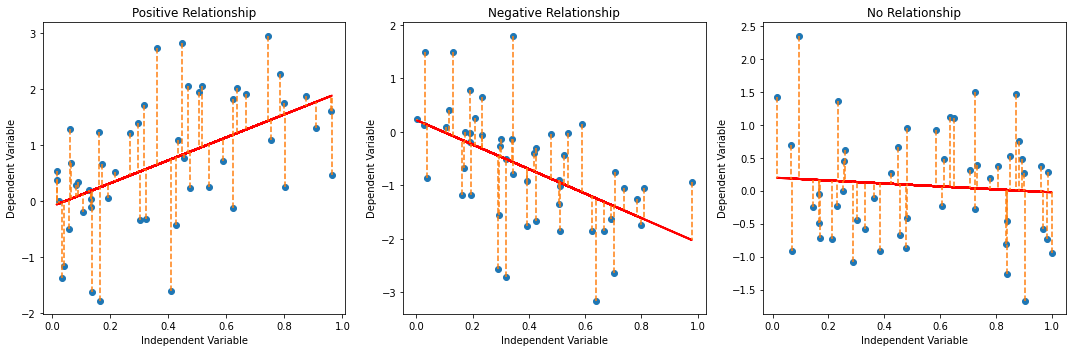

In [19]:
import numpy as np
import matplotlib.pyplot as plt

strength = 2
# Positive relationship
x_positive = np.random.rand(50)
y_positive = strength*x_positive + np.random.randn(50)

# Negative relationship  
x_negative = np.random.rand(50)
y_negative = -strength*x_negative + np.random.randn(50)

# No relationship
x_no_relationship = np.random.rand(50)
y_no_relationship = np.random.randn(50)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Positive relationship
m_positive, b_positive = np.polyfit(x_positive, y_positive, 1)
ax1.scatter(x_positive, y_positive)
ax1.plot(x_positive, m_positive*x_positive + b_positive, color='red', linewidth=2)
for x, yactual, fitted in zip(x_positive, y_positive, m_positive*x_positive + b_positive):
    ax1.plot((x, x), (yactual, fitted), '--', color='C1')
ax1.set_title('Positive Relationship')
ax1.set_xlabel('Independent Variable')
ax1.set_ylabel('Dependent Variable')

# Negative relationship  
m_negative, b_negative = np.polyfit(x_negative, y_negative, 1)
ax2.scatter(x_negative, y_negative)
ax2.plot(x_negative, m_negative*x_negative + b_negative, color='red', linewidth=2)
for x, yactual, fitted in zip(x_negative, y_negative, m_negative*x_negative + b_negative):
    ax2.plot((x, x), (yactual, fitted), '--', color='C1')
ax2.set_title('Negative Relationship')
ax2.set_xlabel('Independent Variable')
ax2.set_ylabel('Dependent Variable')

# No relationship
m_no_relationship, b_no_relationship = np.polyfit(x_no_relationship, y_no_relationship, 1)
ax3.scatter(x_no_relationship, y_no_relationship)
ax3.plot(x_no_relationship, m_no_relationship*x_no_relationship + b_no_relationship, color='red', linewidth=2)
for x, yactual, fitted in zip(x_no_relationship, y_no_relationship, m_no_relationship*x_no_relationship + b_no_relationship):
    ax3.plot((x, x), (yactual, fitted), '--', color='C1')
ax3.set_title('No Relationship')
ax3.set_xlabel('Independent Variable')
ax3.set_ylabel('Dependent Variable')

plt.tight_layout()
plt.show()

In the graphs below, the best fit line will be similar. The only difference will be the number of data points.
Suppose there's a variable $y_i$. The sum of distances between $y_i$ and the predicted value $\hat y_i$ is what is called **sum of squared estimate of errors** or SSE. This is the **unexplained variance** and it must be minimized to get the best accuracy.

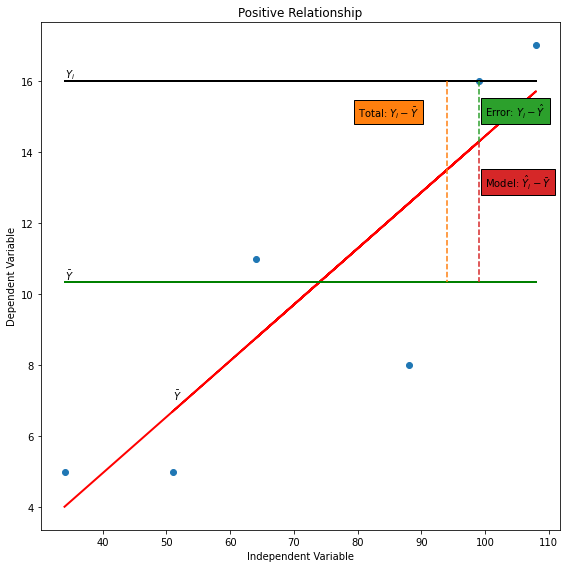

In [179]:
import numpy as np
import matplotlib.pyplot as plt

strength = 2
# Positive relationship
x_positive = np.array([34,108,64,88,99,51])
y_positive = np.array([5,17,11,8,16,5])
mean_values = [np.mean(y_positive)]*len(y_positive)
y_i_values = np.full(6, 16)
x_i = x_positive[4]
y_i = y_positive[4]

fig, ax1 = plt.subplots(figsize=(8, 8))

# Positive relationship
m_positive, b_positive = np.polyfit(x_positive, y_positive, 1)
y_hat_i = m_positive*x_i + b_positive
y_hats = m_positive*x_positive + b_positive

ax1.scatter(x_positive, y_positive)
ax1.plot(x_positive, y_hats, color='red', linewidth=2)
ax1.plot(x_positive, mean_values, color='green', linewidth=2)
ax1.plot(x_positive, y_i_values, color='black', linewidth=2)


step_size = 5
ax1.plot((x_i-step_size, x_i-step_size), (y_i, mean_values[0]), '--', color='C1')
ax1.plot((x_i, x_i), (y_i, y_hat_i), '--', color='C2')
ax1.plot((x_i, x_i), (y_hat_i, mean_values[0]), '--', color='C3')

ax1.text(80, 15, 'Total: $Y_i-\\bar Y$', bbox=dict(facecolor='C1', edgecolor='black'))
ax1.text(100, 15, 'Error: $Y_i-\\hat Y$', bbox=dict(facecolor='C2', edgecolor='black'))
ax1.text(100, 13, 'Model: $\\hat Y_i-\\bar Y$', bbox=dict(facecolor='C3', edgecolor='black'))
ax1.text(34, 16.1, '$Y_i$')
ax1.text(34, 10.4, '$\\bar Y$')
ax1.text(51, 7, '$\\bar Y$')


ax1.set_title('Positive Relationship')
ax1.set_xlabel('Independent Variable')
ax1.set_ylabel('Dependent Variable')

plt.tight_layout()
plt.show()

$$
\text{SSE} = \sum_{i=1}^n (\hat y_i - y_i)^2
$$
The distance between the predicted value and the mean of dependent variable is called **sum of squared residuals** or SSR. This is the **explained variance** of the model and it should be maximized. An advantage of this error is that it can be used as the loss function since it is differentiable at all points. The disadvantage is that it is not robust to outliers.
$$
\text{SSR} = \sum_{i=1}^n (\hat y_i - \bar y)^2
$$
The total variation in the model ($SSR+SSE=SST$) is called the **sum of squared total**.
$$
\text{SST} = \sum_{i=1}^n (y_i - \bar y)^2
$$

> Note that if you think of $Y$, $\hat Y$, and error $\epsilon$ as random variables, equally likely $n$ outcomes, with
> $$
> Y = \beta_0 + \beta_1 X + \epsilon, \text{ }\epsilon \sim \mathcal N(0,1)
> $$ 
> $$
> \hat Y = \beta_0 + \beta_1 X
> $$ 
> it follow that 
> $$
> \frac{SST}{n} = Var(Y), \text{ total variation}
> $$
> $$
> \frac{SSE}{n} = Var(\epsilon), \text{ unexplained variation}
> $$
> $$
> \frac{SSR}{n} = \beta_1^2Var(X), \text{ explained variation}
> $$

## How do you do linear regression?
Here’s an example: you want to know to what degree the tip amount can be predicted by the bill studied. The tip is the dependent variable (response variable) and the bill is the independent variable (predictor variable).

In [143]:
import numpy as np

x_positive = np.array([34,108,64,88,99,51])
y_positive = np.array([5,17,11,8,16,5])
total_bill_v_tip = np.column_stack((x_positive, y_positive))
total_bill_v_tip

array([[ 34,   5],
       [108,  17],
       [ 64,  11],
       [ 88,   8],
       [ 99,  16],
       [ 51,   5]])

To fit the best fit line, you need to minimize the sum of squared errors, which is the distance between the predicted value and actual value.

**Step 1**: Check if there is a linear relationship between the variables.

You already know that the equation of a line is $y=mx+c$ or $y = x\beta_1+\beta_0$. Make a scatter plot to see a relationship between the variables. Remember that the best fit line will always pass through the centroid, which is the intersection of $\bar x$ and $\bar y$.

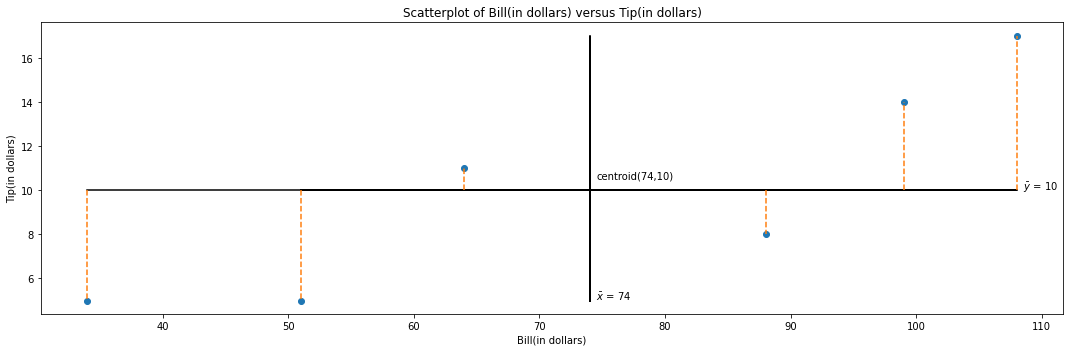

In [180]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

x = np.array([34,108,64,88,99,51])
y = np.array([5,17,11,8,14,5])

centroid_x = int(np.mean(x))
centroid_y = int(np.mean(y))

# Scatterplot of Bill(in dollars) versus Tip(in dollars)
m, b = np.polyfit(x, y, 1)
ax1.scatter(x, y)
ax1.plot(x,[centroid_y]*len(x), color='black')
ax1.plot([centroid_x]*len(x), y, color='black')
for xactual, yactual, fitted in zip(x, y, m*x + b):
    ax1.plot((xactual, xactual), (centroid_y, yactual), '--', color='C1')

ax1.text(centroid_x+.5, centroid_y+.5, f'centroid({centroid_x},{centroid_y})')
ax1.text(centroid_x+.5, np.min(y), f'$\\bar x$ = {centroid_x}')
ax1.text(np.max(x)+.5, centroid_y, f'$\\bar y$ = {centroid_y}')

ax1.set_title('Scatterplot of Bill(in dollars) versus Tip(in dollars)')
ax1.set_xlabel('Bill(in dollars)')
ax1.set_ylabel('Tip(in dollars)')

plt.tight_layout()
plt.show()




You can see that there is a positive relationship. As the bill amount is increased, there is an increase in the tip amount too. Hence, you can use linear regression to predict the response variable.

**Step 2:** Check the correlation of the data.

After plotting a scatter plot and knowing what type of relationship it has, calculate the correlation to know the direction’s strength. In this case, the correlation is 0.866, which shows that the relationship is very strong.

**Step 3:** Calculations.

Now that you know that the relationship is positive and very strong, it’s time to start the calculations.
The equation of best-fit line is: $\hat y = x\beta_1+\beta_0$ where $\beta_1$ is the coefficient of regression or slope. To predict $\hat Y$, you need to know this coefficient. It will also tell you the change in dependent variable if you increase the independent variable by 1 unit. The formula for finding this is:

$$
\beta_1 = \frac{\sum_{n=1}^n (x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n (x_i-\bar x)^2}
$$
and the constant term is calculated by $\beta_0=\bar y-\bar x*\beta_1$


In [185]:
x_bar = centroid_x
y_bar = centroid_y

print(f'x-x_bar: {x-x_bar}')
print(f'y-y_bar: {y-y_bar}')
print(f'(x-x_bar)*(y-y_bar): {(x-x_bar)*(y-y_bar)}')
print(f'(x-x_bar)**2: {(x-x_bar)**2}')

beta_1 = sum((x-x_bar)*(y-y_bar))/sum((x-x_bar)*(x-x_bar))
beta_0 = y_bar-x_bar*beta_1
print(f'beta_1: {beta_1}')
print(f'beta_0: {beta_0}')
print(f'y_hat = beta_1*x+beta_0: y_hat = ({beta_1})x+({beta_0})')


x-x_bar: [-40  34 -10  14  25 -23]
y-y_bar: [-5  7  1 -2  4 -5]
(x-x_bar)*(y-y_bar): [200 238 -10 -28 100 115]
(x-x_bar)**2: [1600 1156  100  196  625  529]
beta_1: 0.14621968616262482
beta_0: -0.8202567760342365
y_hat = beta_1*x+beta_0: y_hat = (0.14621968616262482)x+(-0.8202567760342365)


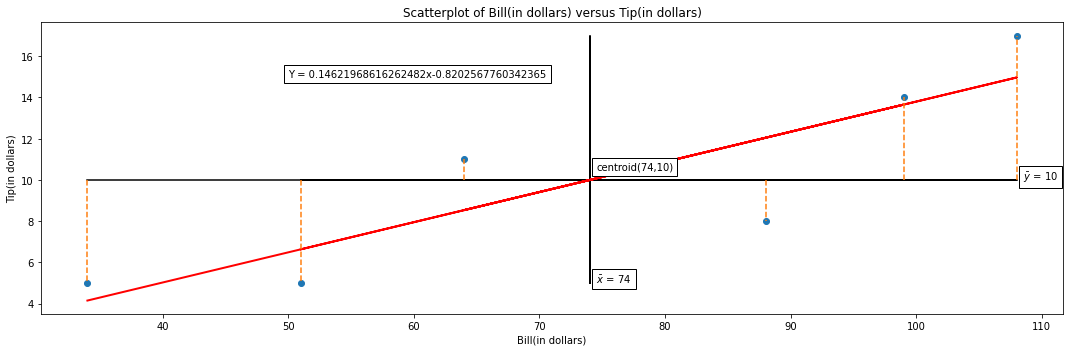

In [188]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15, 5))

x = np.array([34,108,64,88,99,51])
y = np.array([5,17,11,8,14,5])

centroid_x = int(np.mean(x))
centroid_y = int(np.mean(y))

# Scatterplot of Bill(in dollars) versus Tip(in dollars)
m, b = np.polyfit(x, y, 1)
ax1.scatter(x, y)
ax1.plot(x,[centroid_y]*len(x), color='black')
ax1.plot([centroid_x]*len(x), y, color='black')
ax1.plot(x, x*beta_1+beta_0, color='red', linewidth=2)
for xactual, yactual, fitted in zip(x, y, m*x + b):
    ax1.plot((xactual, xactual), (centroid_y, yactual), '--', color='C1')

ax1.text(centroid_x+.5, centroid_y+.5, f'centroid({centroid_x},{centroid_y})', bbox=dict(facecolor='white', edgecolor='black'))
ax1.text(centroid_x+.5, np.min(y), f'$\\bar x$ = {centroid_x}', bbox=dict(facecolor='white', edgecolor='black'))
ax1.text(np.max(x)+.5, centroid_y, f'$\\bar y$ = {centroid_y}', bbox=dict(facecolor='white', edgecolor='black'))
ax1.text(50, 15, f'Y = {beta_1}x-{abs(beta_0)}', bbox=dict(facecolor='white', edgecolor='black'))


ax1.set_title('Scatterplot of Bill(in dollars) versus Tip(in dollars)')
ax1.set_xlabel('Bill(in dollars)')
ax1.set_ylabel('Tip(in dollars)')

plt.tight_layout()
plt.show()




Since there are so many calculations, you can use Python libraries to make the work easier. Next we will interpret the results of a linear regression.

## Interpretation of linear regression result

In [190]:
import statsmodels.api as sm

# Assuming you have your data in X (independent variables) and y (dependent variable)
X = sm.add_constant(x)  # Add a constant for the intercept term
model = sm.OLS(y, X).fit()
model.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.96
Date:                Thu, 09 Jan 2025   Prob (F-statistic):             0.0259
Time:                        23:36:43   Log-Likelihood:                -13.349
No. Observations:                   6   AIC:                             30.70
Df Residuals:                       4   BIC:                             30.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8203      3.323     -0.247      0.817     -10.046       8.406
x1             0.1462      0.042      3.458      0.026       0.029       0.264
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.233
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.647
Skew:                          -0.694   Prob(JB):                        0.724
Kurtosis:                       2.187   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Coefficient of determination (R-squared)
**R-squared** states the proportion of the variability explained by the model:

The $R^2$ score shows the superior results that linear regression can give instead of basing them on the mean of other students.
$$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = 1-\frac{\sum_{i=1}^n (\hat y_i - y_i)^2}{\sum_{i=1}^n (y_i - \bar y)^2}
$$
Also
$$
R^2 = \frac{SSR}{SST} = \frac{\beta_1^2Var(X)}{Var(Y)}, \text{ explained variation}
$$

where it is used to know the accuracy of the model. The range of $R$ square is from 0-1, but can it go below 0? When will this value be 1 and what will that mean?

**Can R square be 0?**

Yes, if both the lines have the same error. If the regression line comes upon the mean line, you can say that both have the same error.

**Can R square be 1?**

Yes. For this to happen, you need the ratio of the regression line error and the mean line error to be equal to 0. It can be 0 only when the error of the regression line is 0. This will happen when the regression line perfectly fits all the points, which is rare.

**Can R square value be -1 or any negative value?**

Yes, but only when the ratio of the regression line error and the mean line error is greater than 1. And this can happen only when $SSR > SST$. This means that the linear regression line error is more than the worst-case scenario and this can happen only when the regression line doesn’t touch a single point.

Here, you can see that the R square value is 0.749, which means that the model could explain 75% variance in the data or that the fitted values represent the original values with good accuracy. 

Since it is a tabular dataset, the values are continuous and the target column must have varying values. By looking at this value, you can say that the features provided to the model were able to explain 75% of the variability. You can’t say anything about the remaining 25%.

Note that a good model has a high R-squared value. 

**But how high is high?**

- R square > 80% implies the model is a good fit.
- 60% < R square < 80% implies the model is an okay fit.
- R square < 60% implies the model needs improvement.
- If your R-squared value is less, you may need to check your independent variables again and see if there are any outliers.

## Adjusted R-squared

Every time you add a new input variable, there will be an increase in the R square. Hence, it’s not wise to use the R square to decide whether to add a new input variable. To address this, a quantity known as **adjusted R-squared**, which is a modified version of R-squared, is used. It’s more useful when you add irrelevant variables to the model. If you add variables that do not affect the target variable, the adjusted R-squared value will decrease and R-squared value will increase. Note that it is always lower than the R square.

Usually, the value of R-squared and adjusted R-squared is somewhat the same. But, if you see a large difference, you need to check your independent variables again and see if there is any relationship between the target variable and the independent variable.

$$
adj-R^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1}
$$

where 
- R square = Coefficient of determination
- N = Total sample size
- p = number of predictors (independent variables) in the model.

**F-statistic:** The value of F-statistic here reveals that not every one of the coefficients of the model may be equivalent to 0. If the overall F-test is significant, you can conclude that R-squared does not equal 0 and that the correlation between the model and dependent variable is statistically significant.

The null hypothesis here is (H0): The model with no independent variables fits the data as well as the model.

The alternate hypothesis (H1): The model fits the data better than the intercept-only model.

The p-value helps check whether there is enough evidence to reject the null hypothesis. If you are testing at a 95% confidence interval then, if:
- p-value < level of significance (in this case 5%), you can reject H0.
- p-value > level of significance, you cannot reject H0.

## Variables

Let's interpret this and see what can be derived. Keep in mind that you need to have rudimentary knowledge of statistics to better understand Machine Learning.

Coefficient: The coefficient of a variable shows that if you increase the independent variable by 1 unit, holding other variables of the model constant (remember, linear regression assumes that there is no multicollinearity in the model, so independent variables have no collinearity between them), then the dependent variable will increase by that much value.

The table shows that the coefficient of age is 257.4050, so if you increase age by 1 year the target variable will increase by 257.4050. If there was a negative coefficient - for example, coefficient of "region" - you would say that increasing the value of the region by 1 unit will see a decrease of -353.4491 in the target variable.

Coefficients can also highlight how significant the variable is for the model. If the coefficient value is close to 0, you can say that there is no relationship between the variable and the target variable.

Standard error: In order to understand standard error, you need to know about standard deviation. Standard deviation tells the variation of the values from the mean or how spread the data is. About 95% of the values lie within 2 standard deviations of the mean.

To interpret standard error in layman’s terms, let’s use a population and pick 10 samples. If you find the mean of these samples and plot them on a standard normal graph, the standard deviation of these samples is what is called a standard error. It will show how accurate the mean of any given sample is from the true population.

$$
SE = \frac{\sigma}{\sqrt{n}}
$$

Here in the regression model, the standard error gives the estimated standard deviation of the distribution of coefficients.

Confusing? Here’s a breakdown:

For every 1 unit increase in age, the target variable will go up by 257.4050. If you re-run the model, the standard error will show that there may be some variation in this coefficient. For example, in age, the standard error of 11.878 shows that the coefficient of age may vary by 11.878 if you re-run the model.

t-stat - t-statistic or t-value is calculated by dividing the coefficient from the standard error.

t-stat = Coefficient/Std.Error
The value of the t-statistic will help determine if the coefficient value is really that number or if it happened by chance. If the value of t-statistic is greater than the tabulated value

you will reject the null hypothesis since the value falls under the rejection area.
The null hypothesis (H0): each of the coefficients at population level is 0.
The alternate hypothesis (H1): the coefficients are not 0 at population level.
The higher the value of t-statistic in magnitude, the more significant the variable is.

P > |t| - p-value is the probability for the null hypothesis to be true. If you look at the p-value of age, you can see that the probability that the null hypothesis is true is approximately equal to 0. P-value will show that it is very unlikely that there is no relationship between the independent variable and the dependent variable, which means that the coefficients are not 0 at the population level.

Typically, a p-value of 5% or less is a good cut-off point. If the p-value is greater than 0.05 (p-value>0.05), then fail to reject the null hypothesis and say that there is no relationship between the variable and the target variable. If it is less than 0.05 (p-value<0.05), reject the null hypothesis and say that the coefficients are not equal to 0.

The higher the value of t-statistic, the lower will be the p-value and the higher will be the chances that the value of the coefficients are significant and didn't happen by chance.

Congratulations on learning to interpret the linear regression model from scratch! It’s always better to know what’s happening under the hood. It’s important to understand what these terms inform in this model as only then will you be able to proceed and make good predictions.